In [1]:
#Author: Michael Elgin (melgin@uwyo.edu)
#2023_10_31

#Notebook for Hyperparameter Optimization

In [2]:
#Modules

#Python 3.11.2
import numpy as np #1.26.0
import pandas as pd #1.5.3
from sklearn.model_selection import train_test_split #1.3.0
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt #3.7.0

In [4]:
#All regression algorithms will use the white wine dataset.
#Classification will use both colors.
df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")
df_all = pd.concat([df_white, df_red], ignore_index=True)

features_red = df_red.iloc[:, :-1]
features_white = df_white.iloc[:, :-1]
features_all = df_all.iloc[:, :-1]
target_red = df_red['quality']
target_white = df_white['quality']
target_all = df_all['quality']

In [5]:
#Model 1 - Decision Tree

from sklearn.tree import DecisionTreeRegressor

#Hyperparams - exponential grid-search
hp_list_max_depth_exponents = [i for i in range(0,7)]
hp_list_max_depth = [2**i for i in hp_list_max_depth_exponents]

hp_list_min_samples_split_exponents = [i for i in range(1, 15)]
hp_list_min_samples_split = [2**i for i in hp_list_min_samples_split_exponents]

parameters = {
    'max_depth' : hp_list_max_depth,
    'min_samples_split' : hp_list_min_samples_split,
}

#Training
DTR_model = DecisionTreeRegressor(random_state=0)
GS = GridSearchCV(DTR_model, parameters, scoring='neg_mean_absolute_percentage_error')
GS.fit(features_white.to_numpy(), target_white.to_numpy())

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64],
                         'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256,
                                               512, 1024, 2048, 4096, 8192,
                                               16384]},
             scoring='neg_mean_absolute_percentage_error')

Best hyperparams overall:
{'max_depth': 8, 'min_samples_split': 512}


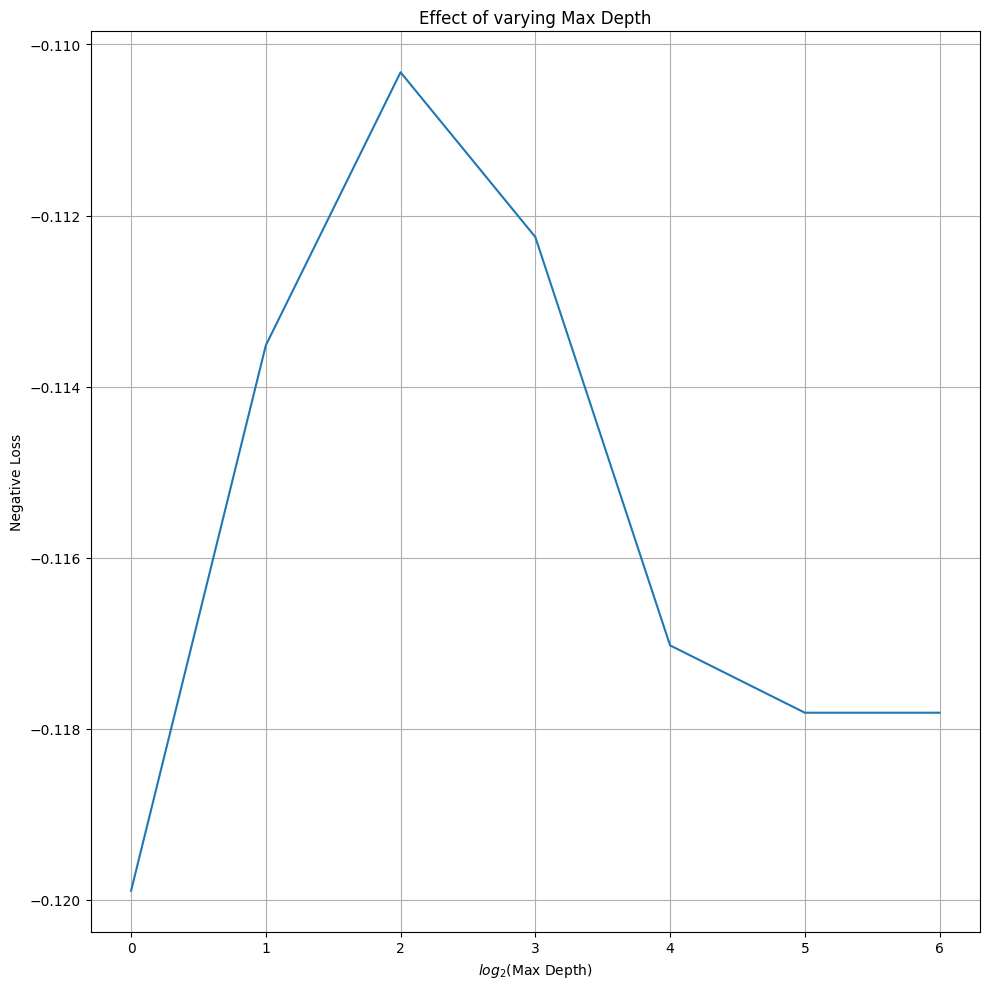

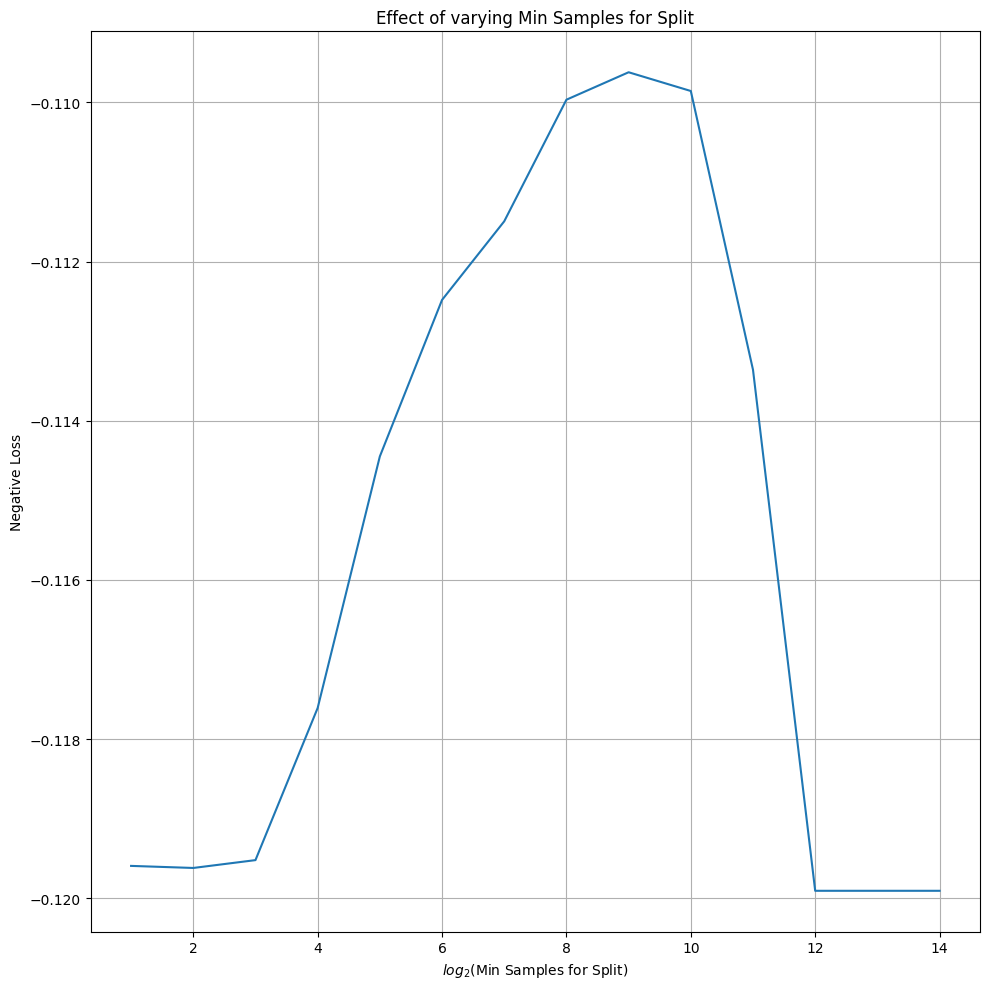

In [10]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_max_depth = GS.cv_results_['param_max_depth']
cv_min_samples_split = GS.cv_results_['param_min_samples_split']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_max_depth, hp_list_max_depth_exponents, cv_max_depth, "Max Depth"), 
                                         (hp_list_min_samples_split, hp_list_min_samples_split_exponents, cv_min_samples_split, "Min Samples for Split")]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    plt.figure(figsize=(10,10))
    plt.plot(exponents, avgs)
    plt.title("Effect of varying " + name)
    plt.xlabel("$log_2$(" + name + ")")
    plt.ylabel("Negative Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("graphs/decision_tree/" + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [14]:
#Model 3 - Random Forest
from sklearn.ensemble import RandomForestRegressor

#Hyperparams - exponential grid-search
hp_list_n_estimators_exponents = [i for i in range(0,7)]
hp_list_n_estimators = [2**i for i in hp_list_n_estimators_exponents]

hp_list_max_depth_exponents = [i for i in range(0,4)]
hp_list_max_depth = [2**i for i in hp_list_max_depth_exponents]

hp_list_min_samples_split_exponents = [i for i in range(1, 4)]
hp_list_min_samples_split = [2**i for i in hp_list_min_samples_split_exponents]

parameters = {
    'n_estimators' : hp_list_n_estimators,
    'max_depth' : hp_list_max_depth,
    'min_samples_split' : hp_list_min_samples_split,
}

#Training
RFR_model = RandomForestRegressor(random_state=0)
GS = GridSearchCV(RFR_model, parameters, scoring='neg_mean_absolute_percentage_error')
GS.fit(features_white.to_numpy(), target_white.to_numpy())

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [1, 2]},
             scoring='neg_mean_absolute_percentage_error')

Best hyperparams overall:
{'max_depth': 8, 'min_samples_split': 512}


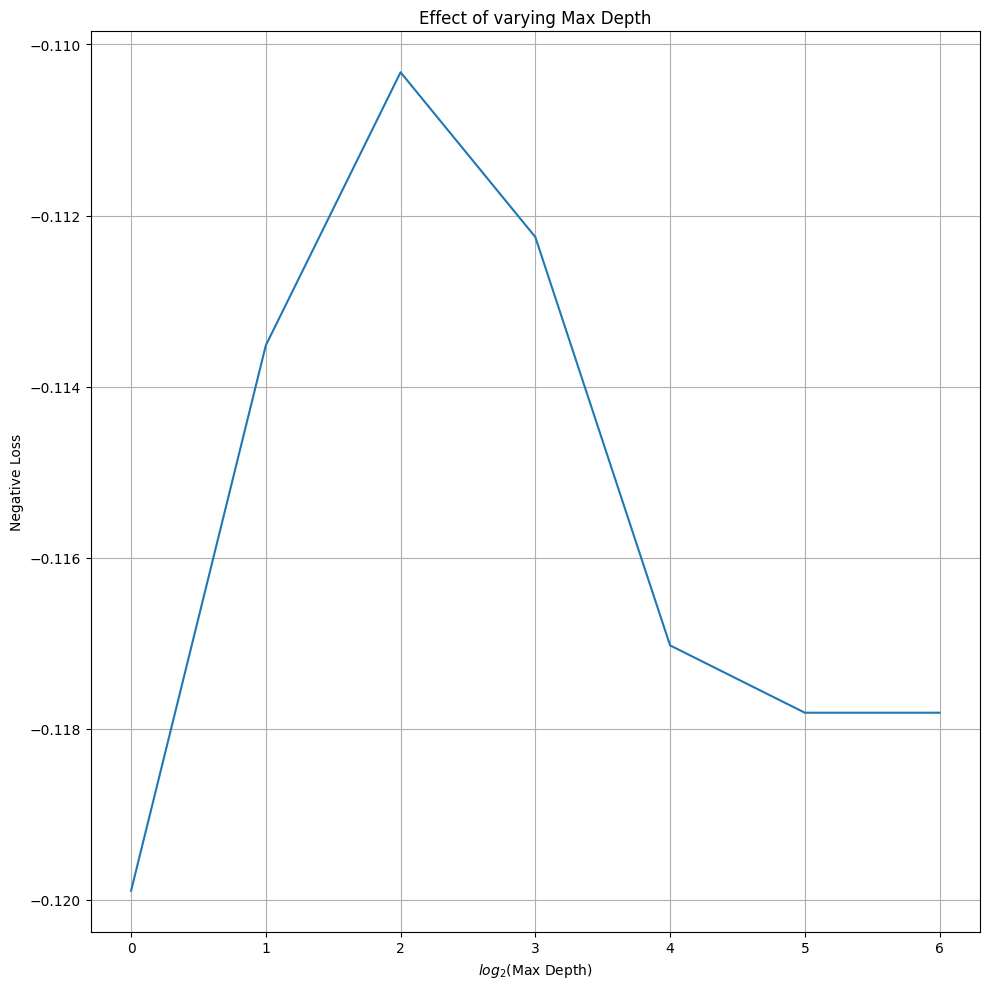

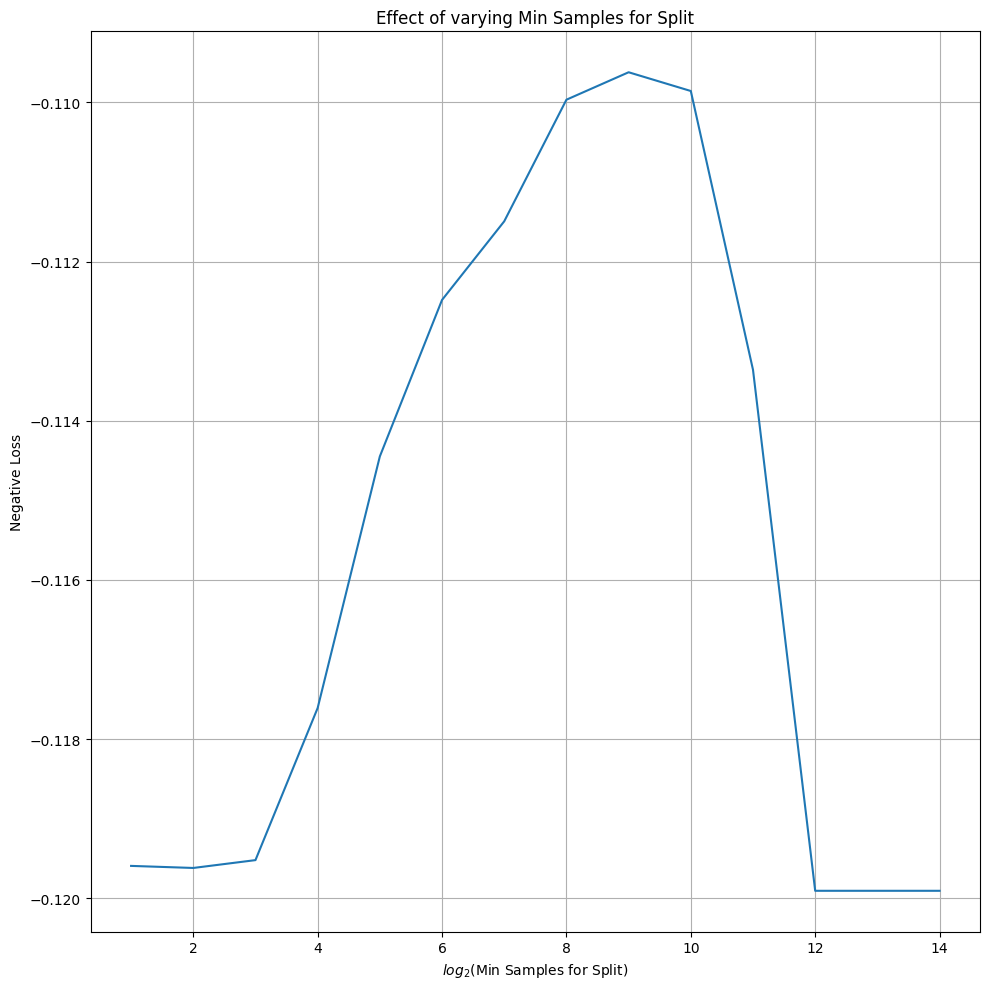

In [ ]:
#Now to plot how the hyperparams change the model performance (on average)

#First to get lists of what params were used at each run
cv_n_estimators = GS.cv_results_['param_n_estimators']
cv_max_depth = GS.cv_results_['param_max_depth']
cv_min_samples_split = GS.cv_results_['param_min_samples_split']

#And the score obtained at that run
performances = GS.cv_results_['mean_test_score']

#Now to loop thru, for every candidate find which runs it was a part of, and take the average of those performances
for hyperparam_list, exponents, cv_results, name in [(hp_list_max_depth, hp_list_max_depth_exponents, cv_max_depth, "Max Depth"), 
                                         (hp_list_min_samples_split, hp_list_min_samples_split_exponents, cv_min_samples_split, "Min Samples for Split"),
                                         (hp_list_n_estimators, hp_list_n_estimators_exponents, cv_n_estimators, "Number of Trees")]:
    avgs = []
    for candidate in hyperparam_list:
        indexes = np.where(cv_results == candidate)[0]
        hyperparam_performances = [performances[index] for index in indexes]
        avg = sum(hyperparam_performances)/len(hyperparam_performances)
        avgs.append(avg)

    plt.figure(figsize=(10,10))
    plt.plot(exponents, avgs)
    plt.title("Effect of varying " + name)
    plt.xlabel("$log_2$(" + name + ")")
    plt.ylabel("Negative Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("graphs/random_forest/" + name)

print("Best hyperparams overall:")
print(GS.best_params_)

In [13]:
#Model 4 - Generalized Additive Model
from pygam import LinearGAM #0.9.0
from pygam import s #This is the smoothing function (cubic spline) to be used for continuous features

#Training
GAM_model = LinearGAM(
    s(0) + 
    s(1) +
    s(2) +
    s(3) +
    s(4) +
    s(5) +
    s(6) +
    s(7) +
    s(8) +
    s(9),
    n_splines=50#Each feature is allowed a max amt of this many splines
)
GAM_model.fit(X_train, y_train)

#Evaluation
y_pred_GAM = GAM_model.predict(X_test)
acc_GAM = evaluate_regressions(y_pred_GAM, y_test)
print("GAM's accuracy for regression: {0:.3f}%".format(acc_GAM))

GAM's accuracy for regression: 50.816%


In [14]:
#Part 2 - HPO for classification

In [15]:
#Construct Classification Dataset

#Target must now become red or white, not the score
df_red = df_red.drop(columns="quality")
df_red['color'] = 0 #0 means red
df_white = df_white.drop(columns="quality")
df_white['color'] = 1 #1 means white

all_data = np.vstack((df_red.to_numpy(), df_white.to_numpy()))

train, test = train_test_split(all_data, test_size=0.2, random_state=0)
X_train = train[:, 0:-1] #Features
y_train = train[:, -1] #Target
X_test = test[:, 0:-1] #Features
y_test = test[:, -1] #Target

In [16]:
#The performance metric here will be accuracy defined by the amount of correct classifications divided by the total.
def evaluate_classifications(predictions:np.ndarray, y_test:np.ndarray) -> float:
    """
    predictions is numpy array of classification values predicted by a model
    returns the percentage of these values that matched that real wine color
    """
    matches = predictions == y_test
    return matches.sum()/len(matches) * 100 #Percent correct

In [25]:
#First a baseline "model" will be created
#This will essentially be a model that merely predicts the dataset mode (most frequent value)
from scipy import stats #1.10.1
mode = stats.mode(y_test).mode[0] #Just the mode of the test set
y_base = np.array([mode for sample in X_test])
acc_base = evaluate_classifications(y_base, y_test)
print("Baseline accuracy for classification: {0:.3f}%".format(acc_base))

Baseline accuracy for classification: 76.077%


C:\Users\micha\AppData\Local\Temp\ipykernel_23444\3642483609.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(y_test).mode[0] #Just the mode of the test set


In [17]:
#Model 1 - Support Vector Classifier
from sklearn.svm import SVC

#Training
SVC_model = SVC(random_state=0)
SVC_model.fit(X_train, y_train)

#Evaluation
y_pred_SVC = SVC_model.predict(X_test)
acc_SVC = evaluate_classifications(y_pred_SVC, y_test)
print("SVC's accuracy for classification: {0:.3f}%".format(acc_SVC))

SVC's accuracy for classification: 93.538%


In [18]:
#Model 2 - Logistic regression
from sklearn.linear_model import LogisticRegression

#Training
Log_model = LogisticRegression(random_state=0)
Log_model.fit(X_train, y_train)

#Evaluation
y_pred_Log = Log_model.predict(X_test)
acc_Log = evaluate_classifications(y_pred_Log, y_test)
print("Logistic regression accuracy for classification: {0:.3f}%".format(acc_Log))

Logistic regression accuracy for classification: 98.692%


c:\Program Files\py3_11_2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#Model 3 - Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

#Training
DTC_model = DecisionTreeClassifier(random_state=0)
DTC_model.fit(X_train, y_train)

#Evaluation
y_pred_DTC = DTC_model.predict(X_test)
acc_DTC = evaluate_classifications(y_pred_DTC, y_test)
print("Decision tree accuracy for classification: {0:.3f}%".format(acc_DTC))

Decision tree accuracy for classification: 98.231%


In [20]:
#Model 4 - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

#Training
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

#Evaluation
y_pred_KNN = KNN_model.predict(X_test)
acc_KNN = evaluate_classifications(y_pred_KNN, y_test)
print("KNN accuracy for classification: {0:.3f}%".format(acc_KNN))

KNN accuracy for classification: 94.923%


In [21]:
#Model 5 - Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Training
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

#Evaluation
y_pred_GNB = GNB_model.predict(X_test)
acc_GNB = evaluate_classifications(y_pred_GNB, y_test)
print("Gaussian Naive Bayes accuracy for classification: {0:.3f}%".format(acc_GNB))

Gaussian Naive Bayes accuracy for classification: 97.615%


In [22]:
#Model 6 - Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

#Training
RFC_model = RandomForestClassifier(random_state=0)
RFC_model.fit(X_train, y_train)

#Evaluation
y_pred_RFC = RFC_model.predict(X_test)
acc_RFC = evaluate_classifications(y_pred_RFC, y_test)
print("Random Forest's accuracy for classification: {0:.3f}%".format(acc_RFC))

Random Forest's accuracy for classification: 99.538%
